In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("D:/Dixant/CDAC/Machine Learning/03-01-22/TimeSeries.csv",parse_dates=['Date'],index_col='Date')

In [3]:
df.head()

,Value
Date,
1991-01-07,3.526591
1991-01-08,3.180891
1991-01-09,3.252221
1991-01-10,3.611003
1991-01-11,3.565869


In [4]:
df.tail()

,Value
Date,
2008-01-02,21.654285
2008-01-03,18.264945
2008-01-04,23.107677
2008-01-05,22.912510
2008-01-06,19.431740


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-01-07 to 2008-01-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [6]:
df.describe()

,Value
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


<AxesSubplot:xlabel='Date'>

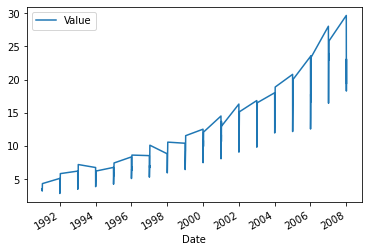

In [7]:
df.plot()

In [8]:
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()
print(rolmean,rolstd)

                Value
Date                 
1991-01-07        NaN
1991-01-08        NaN
1991-01-09        NaN
1991-01-10        NaN
1991-01-11        NaN
...               ...
2008-01-02  22.686363
2008-01-03  22.559045
2008-01-04  23.115743
2008-01-05  23.275057
2008-01-06  23.170952

[204 rows x 1 columns]                Value
Date                
1991-01-07       NaN
1991-01-08       NaN
1991-01-09       NaN
1991-01-10       NaN
1991-01-11       NaN
...              ...
2008-01-02  3.345999
2008-01-03  3.491994
2008-01-04  2.909515
2008-01-05  2.834552
2008-01-06  2.958707

[204 rows x 1 columns]


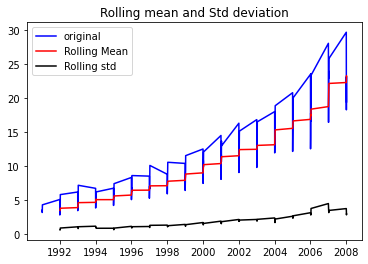

In [9]:
orig = plt.plot(df,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling mean and Std deviation')
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
test_result=adfuller(df['Value'])
test_result 

(3.1451856893067336,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364172)

In [12]:
def adfuller_test(value):
    result=adfuller(value)
    print(result)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis.")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [13]:
adfuller_test(df['Value'])

(3.1451856893067336, 1.0, 15, 188, {'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}, 549.6705685364172)
ADF Test Statistic : 3.1451856893067336
p-value : 1.0
#Lags Used : 15
Number of Observations Used : 188
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [14]:
df['Value First Difference'] = df['Value'] - df['Value'].shift(1)

In [15]:
df['Value'].shift(1)

Date
1991-01-07          NaN
1991-01-08     3.526591
1991-01-09     3.180891
1991-01-10     3.252221
1991-01-11     3.611003
                ...    
2008-01-02    29.665356
2008-01-03    21.654285
2008-01-04    18.264945
2008-01-05    23.107677
2008-01-06    22.912510
Name: Value, Length: 204, dtype: float64

In [16]:
df['Seasonal First Difference']=df['Value']-df['Value'].shift(12)

In [17]:
df.head(14)

,Value,Value First Difference,Seasonal First Difference
Date,,,
1991-01-07,3.526591,NaN,NaN
1991-01-08,3.180891,-0.345700,NaN
1991-01-09,3.252221,0.071330,NaN
1991-01-10,3.611003,0.358782,NaN
1991-01-11,3.565869,-0.045134,NaN
1991-01-12,4.306371,0.740502,NaN
1992-01-01,5.088335,0.781964,NaN
1992-01-02,2.814520,-2.273815,NaN
1992-01-03,2.985811,0.171291,NaN


In [18]:
adfuller_test(df['Seasonal First Difference'].dropna())

(-2.0927226596423822, 0.24745090770395106, 13, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 492.78857323603137)
ADF Test Statistic : -2.0927226596423822
p-value : 0.24745090770395106
#Lags Used : 13
Number of Observations Used : 178
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


<AxesSubplot:xlabel='Date'>

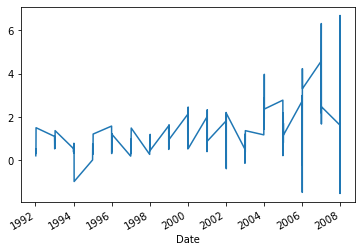

In [19]:
df['Seasonal First Difference'].plot()

In [20]:
rolmean = df['Seasonal First Difference'].rolling(window=12).mean()
rolstd = df['Seasonal First Difference'].rolling(window=12).std()
print(rolmean,rolstd)

Date
1991-01-07         NaN
1991-01-08         NaN
1991-01-09         NaN
1991-01-10         NaN
1991-01-11         NaN
                ...   
2008-01-02    3.591926
2008-01-03    3.104130
2008-01-04    3.478014
2008-01-05    3.369188
2008-01-06    2.899299
Name: Seasonal First Difference, Length: 204, dtype: float64 Date
1991-01-07         NaN
1991-01-08         NaN
1991-01-09         NaN
1991-01-10         NaN
1991-01-11         NaN
                ...   
2008-01-02    1.617696
2008-01-03    2.165939
2008-01-04    2.371948
2008-01-05    2.414553
2008-01-06    2.726477
Name: Seasonal First Difference, Length: 204, dtype: float64


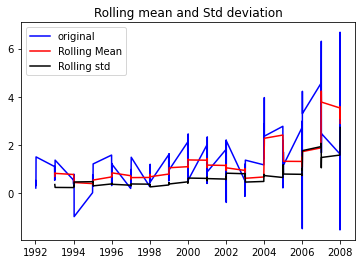

In [21]:
orig = plt.plot(df['Seasonal First Difference'],color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling mean and Std deviation')
plt.show()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

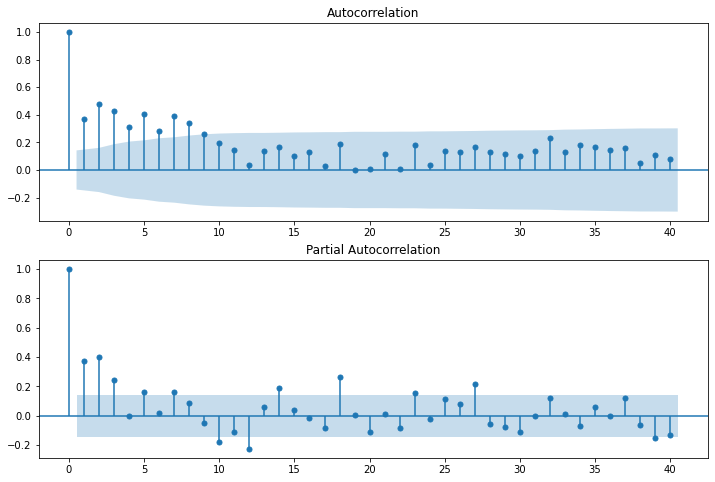

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model=ARIMA(df['Value'],order=(1,1,1))
model_fit=model.fit()

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                  203
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -417.919
Method:                       css-mle   S.D. of innovations              1.890
Date:                Tue, 04 Jan 2022   AIC                            843.838
Time:                        15:18:42   BIC                            857.091
Sample:                             1   HQIC                           849.200
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0965      0.017      5.650      0.000       0.063       0.130
ar.L1.D.Value     0.3140      0.075      4.183      0.000       0.167       0.461
ma.L1.D.Value    -0.9164      0.026    -34.915      0.000      -0.968      -0.865
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.1845           +0.0000j            3.1845            0.0000
MA.1            1.0912           +0.0000j            1.0912            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

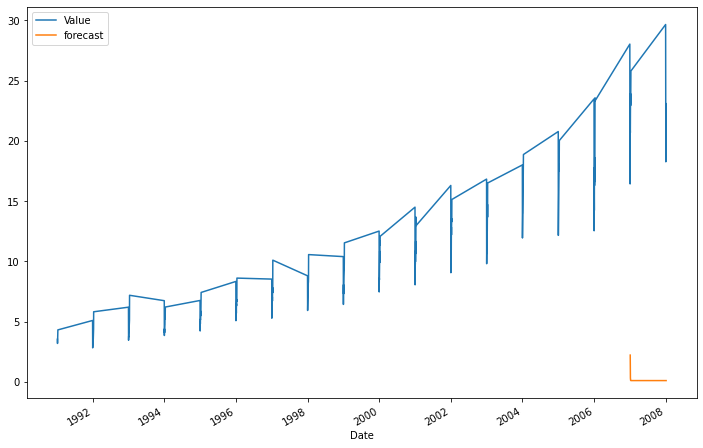

In [27]:
df['forecast']=model_fit.predict(start=190,end=203,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [28]:
import statsmodels.api as sm

In [29]:
model=sm.tsa.statespace.SARIMAX(df['Value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


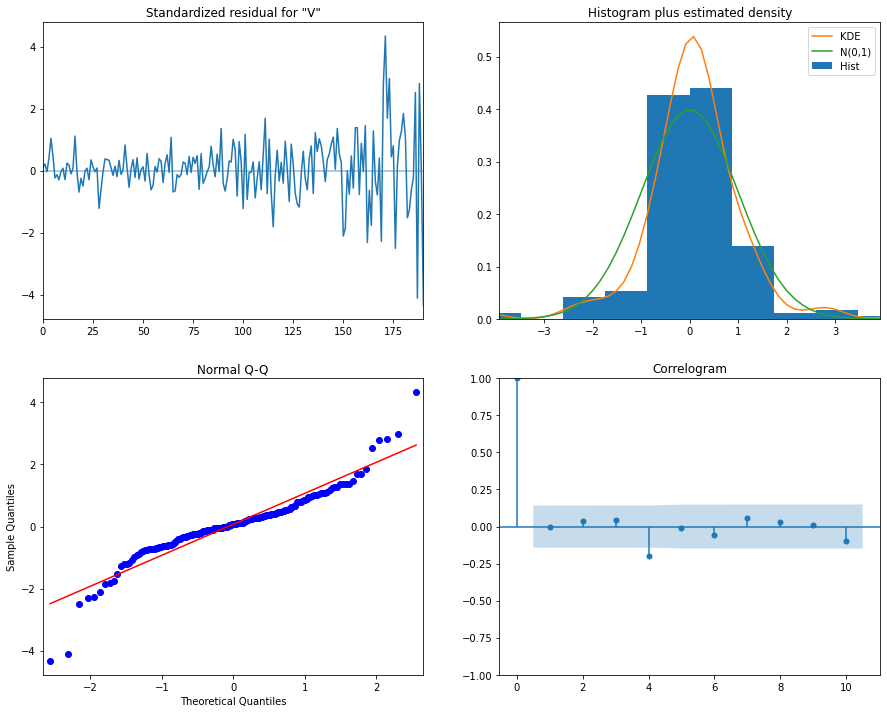

In [30]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

<AxesSubplot:xlabel='Date'>

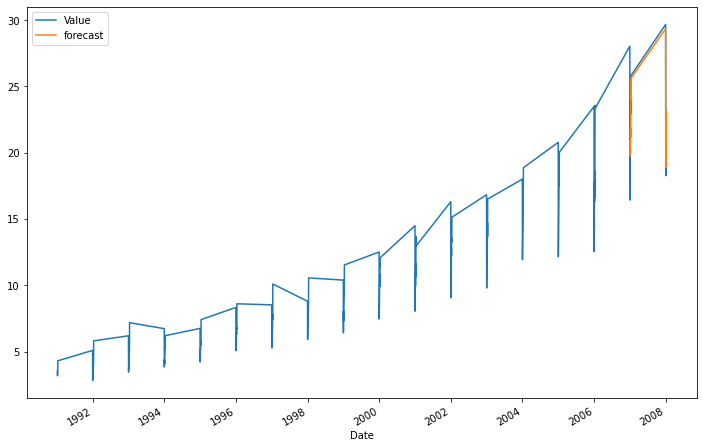

In [31]:
df['forecast']=results.predict(start=190,end=203,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [32]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_dates

[Timestamp('2008-01-06 00:00:00'),
 Timestamp('2008-02-06 00:00:00'),
 Timestamp('2008-03-06 00:00:00'),
 Timestamp('2008-04-06 00:00:00'),
 Timestamp('2008-05-06 00:00:00'),
 Timestamp('2008-06-06 00:00:00'),
 Timestamp('2008-07-06 00:00:00'),
 Timestamp('2008-08-06 00:00:00'),
 Timestamp('2008-09-06 00:00:00'),
 Timestamp('2008-10-06 00:00:00'),
 Timestamp('2008-11-06 00:00:00'),
 Timestamp('2008-12-06 00:00:00'),
 Timestamp('2009-01-06 00:00:00'),
 Timestamp('2009-02-06 00:00:00'),
 Timestamp('2009-03-06 00:00:00'),
 Timestamp('2009-04-06 00:00:00'),
 Timestamp('2009-05-06 00:00:00'),
 Timestamp('2009-06-06 00:00:00'),
 Timestamp('2009-07-06 00:00:00'),
 Timestamp('2009-08-06 00:00:00'),
 Timestamp('2009-09-06 00:00:00'),
 Timestamp('2009-10-06 00:00:00'),
 Timestamp('2009-11-06 00:00:00'),
 Timestamp('2009-12-06 00:00:00')]

In [33]:
df.columns

Index(['Value', 'Value First Difference', 'Seasonal First Difference',
       'forecast'],
      dtype='object')

In [34]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns,dtype='int')

In [39]:
future_datest_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 2008-02-06 to 2009-12-06
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Value                      0 non-null      float64
 1   Value First Difference     0 non-null      float64
 2   Seasonal First Difference  0 non-null      float64
 3   forecast                   0 non-null      float64
dtypes: float64(4)
memory usage: 920.0 bytes


In [36]:
future_df=pd.concat([df,future_datest_df])

In [41]:
future_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 227 entries, 1991-01-07 to 2009-12-06
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Value                      204 non-null    float64
 1   Value First Difference     203 non-null    float64
 2   Seasonal First Difference  192 non-null    float64
 3   forecast                   0 non-null      float64
dtypes: float64(4)
memory usage: 8.9 KB


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:>

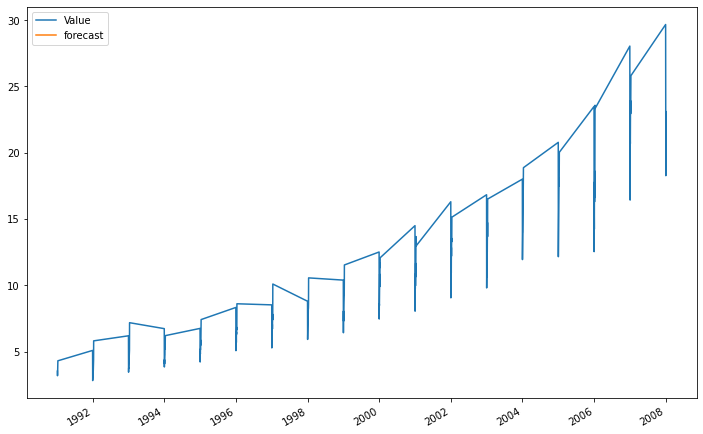

In [37]:
future_df['forecast'] = results.predict(start = 204, end = 220, dynamic= True) 
future_df[['Value', 'forecast']].plot(figsize=(12, 8)) 